In [ ]:
!pip install plotly 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.offline as pyo
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/KeithGalli/pandas.git

Cloning into 'pandas'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 22 (delta 4), reused 3 (delta 3), pack-reused 16
Unpacking objects: 100% (22/22), 121.31 KiB | 1.99 MiB/s, done.


In [ ]:
df = pd.read_csv("/content/pandas/pokemon_data.csv")

In [ ]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


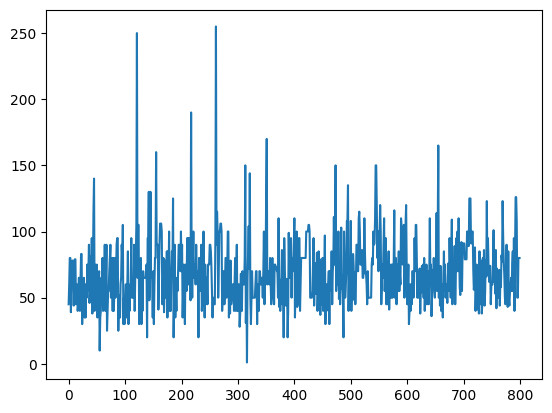

In [ ]:
plt.plot(df["HP"])
plt.show()

In [ ]:
pyo.plot([{
    'x' : df.index,
    'y' : df.HP
}])

'temp-plot.html'

In [ ]:
# plot two variables in one graph 
pyo.plot([{
    'x' : df.index,
    'y' : df[cols]
}
for cols in df.columns[4:6]])

'temp-plot.html'

In [ ]:
# Plotting data as a function of another set of data.
import plotly.graph_objs as go 

pyo.plot([
        go.Scatter(
        x = df["HP"],
        y = df["Speed"],
        mode = "markers",
        )
])

'temp-plot.html'

In [ ]:
# Plotting data as a function of another set of data. more options
import plotly.graph_objs as go 

pyo.plot([
        go.Scatter(
        x = df["HP"],
        y = df["Speed"],
        mode = "markers",
        marker = dict(size = 14, color = 'rgb(120,150,120)',symbol = 'square',line=dict(width=2)))
])

'temp-plot.html'

In [ ]:
# Another way: 
data = [go.Scatter(x = df["HP"],y = df["Speed"],mode = "markers",)]
layout = go.Layout(title = "my title", xaxis = dict(title = 'X'), yaxis = dict(title = 'Y'))
figure = go.Figure(data = data , layout = layout)
pyo.plot(figure)

'temp-plot.html'

In [ ]:
#Bar chart 
order_priority = pd.pivot_table(df , values = "HP",index = "Type 1")
order_priority

,HP
Type 1,
Bug,56.884058
Dark,66.806452
Dragon,83.312500
Electric,59.795455
Fairy,74.117647
Fighting,69.851852
Fire,69.903846
Flying,70.750000
Ghost,64.437500


In [ ]:
data = [go.Bar(x = order_priority.index[1:5], y = order_priority["HP"] , name = "HP")]
layout = go.Layout(title = "HP")
fig = go.Figure(data = data, layout = layout)

In [ ]:
pyo.plot(fig)

'temp-plot.html'

Type 1
Bug         56.884058
Dark        66.806452
Dragon      83.312500
Electric    59.795455
Fairy       74.117647
Fighting    69.851852
Fire        69.903846
Flying      70.750000
Ghost       64.437500
Grass       67.271429
Ground      73.781250
Ice         72.000000
Normal      77.275510
Poison      67.250000
Psychic     70.631579
Rock        65.363636
Steel       65.222222
Water       72.062500
Name: HP, dtype: float64

In [ ]:
#Lines
data = [go.Scatter(x = df["#"],y = df["HP"],mode = "lines",)]
layout = go.Layout(title = "my title", xaxis = dict(title = 'X'), yaxis = dict(title = 'Y'))
figure = go.Figure(data = data , layout = layout)
pyo.plot(figure)

'temp-plot.html'

In [ ]:
# Lines with more than one graph
trace1 = go.Scatter(x = df["#"],y = df["HP"],mode = "lines")
trace2 = go.Scatter(x = df["#"],y = df["Speed"],mode = "lines")
data = [trace1 , trace2]
layout = go.Layout(title = "my title", xaxis = dict(title = 'X'), yaxis = dict(title = 'Y'))
figure = go.Figure(data = data , layout = layout)
pyo.plot(figure)

'temp-plot.html'

In [ ]:
# Line with markers and more than one graph
trace1 = go.Scatter(x = df["#"],y = df["HP"],mode = "markers+lines")
trace2 = go.Scatter(x = df["#"],y = df["Speed"],mode = "lines")
data = [trace1 , trace2]
layout = go.Layout(title = "my title", xaxis = dict(title = 'X'), yaxis = dict(title = 'Y'))
figure = go.Figure(data = data , layout = layout)
pyo.plot(figure)

'temp-plot.html'

In [ ]:
# Stack bar  
order_priority = pd.pivot_table(df , values = ["HP","Speed"],index = "Type 1")
print(order_priority)
trace1 = go.Bar(x = order_priority.index[1:5], y = order_priority["HP"] , name = "HP")
trace2 = go.Bar(x = order_priority.index[1:5], y = order_priority["Speed"] , name = "Speed")
data = [trace1, trace2]
layout = go.Layout(title = "title", barmode = "stack")
fig = go.Figure(data = data, layout = layout)
pyo.plot(fig)

                 HP       Speed
Type 1                         
Bug       56.884058   61.681159
Dark      66.806452   76.161290
Dragon    83.312500   83.031250
Electric  59.795455   84.500000
Fairy     74.117647   48.588235
Fighting  69.851852   66.074074
Fire      69.903846   74.442308
Flying    70.750000  102.500000
Ghost     64.437500   64.343750
Grass     67.271429   61.928571
Ground    73.781250   63.906250
Ice       72.000000   63.458333
Normal    77.275510   71.551020
Poison    67.250000   63.571429
Psychic   70.631579   81.491228
Rock      65.363636   55.909091
Steel     65.222222   55.259259
Water     72.062500   65.964286


'temp-plot.html'

In [ ]:
#Bubble chart 
data = [go.Scatter(x = df["HP"],y = df["Speed"],mode = "markers",marker = dict(size =0.1 *df['HP']))]
layout = go.Layout(title = "my title", xaxis = dict(title = 'X'), yaxis = dict(title = 'Y'),hovermode = 'closest')
figure = go.Figure(data = data , layout = layout)
pyo.plot(figure)

'temp-plot.html'

In [ ]:
#Histogram 
data = [go.Histogram(x = df["HP"],y = df["Speed"],opacity = 0.5)]
layout = go.Layout(title = "my title", xaxis = dict(title = 'X'), yaxis = dict(title = 'Y'),hovermode = 'closest')
figure = go.Figure(data = data , layout = layout)
pyo.plot(figure)

'temp-plot.html'